In [1]:
import pandas as pd

adult = pd.read_csv("adultData.csv")
adult.columns


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [2]:
adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult = adult.drop(columns=[" fnlwgt"])
#

In [4]:
adult.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

In [5]:
import numpy as np
adult = pd.read_csv("adultData.csv")
# Zmiana znaków '?' na NaN w całym DataFrame. Plik był w formacie ".data" więc trzeba było najpierw zamienić " ?" na NaN
adult.replace(' ?', np.nan, inplace=True)
null_counts = adult.isna().sum()
print(null_counts)

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64


In [6]:
columns_with_null = [" workclass", " occupation", " native-country"]

for column in columns_with_null:
    print("\nLiczność kategorii (bez NaN):")
    print(adult[column].value_counts())
    print("\nRozkład kategorii (bez NaN) [%]:")
    print((adult[column].value_counts(normalize=True) * 100).round(2))



Liczność kategorii (bez NaN):
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Rozkład kategorii (bez NaN) [%]:
 workclass
Private             73.87
Self-emp-not-inc     8.27
Local-gov            6.81
State-gov            4.22
Self-emp-inc         3.63
Federal-gov          3.12
Without-pay          0.05
Never-worked         0.02
Name: proportion, dtype: float64

Liczność kategorii (bez NaN):
 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Rozk

In [7]:
# Metoda imputacji - wypełnienie brakujących wartości najczęściej występującą wartością (modą) w danej kolumnie dla native country i workclass
# Jest to spowodowane tym żę większosć osób jest z United States a liczba workslass jest za mała (a<5%) żeby miała znaczący wpływ na wyniki
# Dla occupation użyjemy innej metody, ponieważ jest tam zbyt wiele kategorii i moda może nie być reprezentatywna dla brakujących danych. Mogą to być np. zawody które są mniej powszechne czy legalnie nie zatrudniane.


In [8]:
print(adult.describe())

                age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000  


In [9]:
# Wybór zmiennych do imputacji
categorical_cols = [" workclass", " occupation", " native-country"]
numerical_cols = adult.select_dtypes(include=np.number).columns

# Sprawdzenie braków w zmiennych numerycznych
print(adult[numerical_cols].isna().sum())

# Sprawdzenie braków w zmiennych kategorycznych
print(adult[categorical_cols].isna().sum())

# Brak braków więc nie imputujemy zmiennych numerycznych

age                0
 fnlwgt            0
 education-num     0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
dtype: int64
workclass         1836
occupation        1843
native-country     583
dtype: int64


In [10]:
# Analiza zależności (UZASADNIENIE imputacji)
# Cramér’s V — stosowany do analizy zależności kategoria–kategoria
# (occupation a workclass)
#  Przyczyna: chcemy wiedzieć, czy imputacja warunkowa ma sens
#  Skutek: jeśli zależność jest istotna - imputacja warunkowa

from scipy.stats import chi2_contingency, f_oneway

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(
    adult[" occupation"].dropna(),
    adult.loc[adult[" occupation"].notna(), " workclass"])

# Przyczyna:
# Cramér’s V = 0.22 → umiarkowana zależność occupation–workclass
# Skutek:
# imputacja warunkowa oparta wyłącznie na workclass byłaby niewystarczająca
# Decyzja:
# workclass wykorzystujemy pomocniczo, ale konieczne jest włączenie zmiennej liczbowej education-num, dla której wykazano bardzo silną zależność (ANOVA).

# Analiza zależności pomiędzy zmiennymi occupation i workclass z wykorzystaniem miary Craméra V wykazała umiarkowaną zależność (V = 0.22). Oznacza to, że typ zatrudnienia ma pewien wpływ na wykonywany zawód, jednak nie jest on na tyle silny, aby stanowić jedyną podstawę imputacji. W związku z tym zmienna workclass została wykorzystana jedynie pomocniczo, a kluczową rolę w imputacji occupation przypisano zmiennej education-num, dla której analiza wariancji wykazała bardzo silną zależność.

#Cramér’s V: occupation vs inne kategorie
categorical_vars = [" workclass", " sex", " race", " education"]

for col in categorical_vars:
    v = cramers_v(
        adult[" occupation"].dropna(),
        adult.loc[adult[" occupation"].notna(), col]
    )
    print(f"Cramér’s V (occupation vs {col}): {v:.3f}")


# < 0.2 → słaba zależność
# 0.2–0.4 → umiarkowana
# > 0.4 → silna


Cramér’s V (occupation vs  workclass): 0.215
Cramér’s V (occupation vs  sex): 0.434
Cramér’s V (occupation vs  race): 0.080
Cramér’s V (occupation vs  education): 0.196


In [11]:
# ANOVA — kategoria–liczba
# (occupation a education-num)
#  Przyczyna: sprawdzamy, czy poziom wykształcenia różni się między zawodami
#  Skutek: uzasadnienie użycia education-num w imputacji

# groups = [
#     adult.loc[adult[" occupation"] == occ, " education-num"]
#     for occ in adult[" occupation"].dropna().unique()]
#
# f_stat, p_value = f_oneway(*groups)
# f_stat, p_value

# otrzymane wyniki to
# F = 1133.97 - ekstremalnie duże zróżnicowanie średnich education-num pomiędzy kategoriami occupation.
# p-value = 0.0
# p < 0.001 (w praktyce p jest bardzo bliskie zeru)
# odrzucamy hipotezę zerową o równych średnich
# wniosek statystyczny: Istnieją bardzo silne,  istotne różnice w poziomie wykształcenia pomiędzy poszczególnymi zawodami.

# co to dla nas znaczy : imputowanie occupation bez uwzględnienia wykształcenia (np. modą globalną)
# wprowadziłoby nielogiczne kombinacje (np. niski poziom edukacji a zawody specjalistyczne)

 # Analiza wariancji (ANOVA) wykazała istotne statystycznie różnice w poziomie wykształcenia pomiędzy kategoriami zmiennej occupation (F = 1133.97, p < 0.001). Oznacza to silną zależność pomiędzy wykonywanym zawodem a poziomem wykształcenia. W związku z tym zastosowano imputację warunkową zmiennej occupation, uwzględniającą zmienne education-num oraz workclass, co pozwoliło zachować spójność semantyczną danych.

# numerical_vars = [
#     "education-num",
#     "hours-per-week",
#     "age",
#     "capital-gain",
#     "capital-loss"]
#
# for col in numerical_vars:
#     groups = [
#         adult.loc[adult["occupation"] == occ, col]
#         for occ in adult["occupation"].dropna().unique()
#     ]
#     f_stat, p_val = f_oneway(*groups)
#     print(f"ANOVA (occupation vs {col}): F={f_stat:.2f}, p={p_val:.2e}")


import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Wczytanie danych
adult = pd.read_csv("adultData.csv")

# 1. Oczyszczenie nazw kolumn (usuwa spacje z przodu i z tyłu)
adult.columns = adult.columns.str.strip()

# 2. Zamiana " ?" na NaN
adult.replace("?", np.nan, inplace=True)

# 3. ANOVA — occupation vs education-num
groups = [
    adult.loc[adult["occupation"] == occ, "education-num"]
    for occ in adult["occupation"].dropna().unique()
]

f_stat, p_value = f_oneway(*groups)
print("ANOVA (occupation vs education-num):", f_stat, p_value)

# 4. Lista zmiennych numerycznych \*bez\* spacji
numerical_vars = [
    "education-num",
    "hours-per-week",
    "age",
    "capital-gain",
    "capital-loss",
]

# 5. ANOVA: occupation vs każda zmienna numeryczna
for col in numerical_vars:
    groups = [
        adult.loc[adult["occupation"] == occ, col]
        for occ in adult["occupation"].dropna().unique()
    ]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA (occupation vs {col}): F={f_stat:.2f}, p={p_val:.2e}")



ANOVA (occupation vs education-num): 1043.4019356996996 0.0
ANOVA (occupation vs education-num): F=1043.40, p=0.00e+00
ANOVA (occupation vs hours-per-week): F=249.71, p=0.00e+00
ANOVA (occupation vs age): F=83.75, p=3.52e-237
ANOVA (occupation vs capital-gain): F=33.72, p=3.90e-91
ANOVA (occupation vs capital-loss): F=16.96, p=1.63e-42


In [12]:
# Interpretacja jest czysto statystyczna i „pod kątem imputacji”:
# `occupation vs education-num`
# F ≈ 1043.4, p ≈ 0
# → ekstremalnie silne, istotne statystycznie zróżnicowanie poziomu wykształcenia między zawodami.
# Wniosek: education-num jest bardzo mocno powiązana z occupation, świetna zmienna do imputacji occupation.
# `occupation vs hours-per-week`
# F ≈ 249.7, p ≈ 0
# → bardzo silne różnice liczby godzin pracy między zawodami.
# Wniosek: godziny pracy też dobrze odróżniają zawody, mogą być użyte jako dodatkowa zmienna pomocnicza.
# `occupation vs age`
# F ≈ 83.8, p ≈ 3.5e-237
# → istotne, wyraźne różnice wieku między zawodami, ale słabsze niż dla education-num i hours-per-week.
# Wniosek: wiek ma znaczenie, ale jest mniej „charakterystyczny” dla zawodu niż edukacja i godziny.
# `occupation vs capital-gain`
# F ≈ 33.7, p ≈ 3.9e-91
# → istotne różnice w capital-gain między zawodami, ale efekt już wyraźnie słabszy.
# Wniosek: może wspierać imputację, ale nie jest kluczową zmienną.
# `occupation vs capital-loss`
# F ≈ 17.0, p ≈ 1.6e-42
# → też istotne statystycznie, ale najsłabszy efekt z wymienionych.
# Wniosek: raczej pomocnicza, mało „nośna” zmienna.
# Podsumowując:
# H0 („średnie są równe między zawodami”) jest odrzucona dla wszystkich zmiennych.
# Najsilniej z occupation związane są: `education-num` (zdecydowanie) i `hours-per-week`.
# Do imputacji occupation najbardziej sensownie użyć `education-num` jako głównego predyktora, a `hours-per-week`, `age`, ewentualnie `capital-gain/loss` jako uzupełnienie, jeśli chcesz budować bogatszy model.

In [13]:
# native-country  ~2.5% braków, zdominowana przez United-States.
#  Imputacja modą globalną (najczęstsza wartość w całej kolumnie).
# workclass dużo braków (~30%), zależność z occupation umiarkowana, ale są inne predyktory.
# KNN na zmiennych: occupation, education-num, education, sex, race, age, hours-per-week.
# occupation dużo braków (~30%), bardzo silny związek z education-num i silny z hours-per-week, umiarkowany z workclass.
# imputacja warunkowa z użyciem modelu predykcyjnego KNN na cechach:
# liczbowych: education-num (kluczowa), hours-per-week, age, capital-gain, capital-loss,
# kategorycznych: workclass, education, sex, race.
# Czyli w skrócie:
# native-country → moda globalna,
# workclass → moda w grupach ,
# occupation → model predykcyjny (warunkowa imputacja na bazie education-num + innych).
# Przykładowa prosta wersja (moda globalna i w grupach):

In [14]:
# Ujednolicenie nazw kolumn (jeśli jeszcze nie zrobione)
adult.columns = adult.columns.str.strip()

# Ujednolicenie braków (w Adult często jest " ?")
adult.replace([" ?", "?"], np.nan, inplace=True)

# Wiersze gdzie jednocześnie workclass i occupation są NaN
mask = adult["workclass"].isna() & adult["occupation"].isna()

print("Liczba rekordów z brakami w obu kolumnach:", int(mask.sum()))

# Podgląd przykładowych rekordów
print(adult.loc[mask].head(20))

# (opcjonalnie) same indeksy takich wierszy
idx = adult.index[mask]
print("Pierwsze indeksy:", idx[:20].tolist())


Liczba rekordów z brakami w obu kolumnach: 1836
     age workclass  fnlwgt      education  education-num  \
27    54       NaN  180211   Some-college             10   
61    32       NaN  293936        7th-8th              4   
69    25       NaN  200681   Some-college             10   
77    67       NaN  212759           10th              6   
106   17       NaN  304873           10th              6   
128   35       NaN  129305        HS-grad              9   
149   43       NaN  174662   Some-college             10   
154   52       NaN  252903        HS-grad              9   
160   68       NaN   38317        1st-4th              2   
187   53       NaN  135105      Bachelors             13   
201   19       NaN  170653        HS-grad              9   
221   64       NaN  187656        1st-4th              2   
226   60       NaN   24215           10th              6   
243   20       NaN  119156   Some-college             10   
266   19       NaN  218956   Some-college           

In [15]:
import numpy as np
import pandas as pd


def hot_deck_basic(
    df: pd.DataFrame,
    target: str,
    match_specs: list[list[str]],
    random_state: int = 42,
    fallback_global_mode: bool = True,
) -> pd.DataFrame:
    """
    Hot-deck: dla każdego NaN w kolumnie target:
    - szukaj dawców po kolejnych zestawach kluczy (match_specs),
    - losuj wartość z puli dawców,
    - jeśli brak dawców: (opcjonalnie) wstaw globalną modę.
    """
    out = df.copy()
    rng = np.random.default_rng(random_state)

    miss_idx = out.index[out[target].isna()].to_numpy()
    if miss_idx.size == 0:
        return out

    global_mode = np.nan
    if fallback_global_mode:
        m = out[target].mode(dropna=True)
        global_mode = m.iloc[0] if not m.empty else np.nan

    for i in miss_idx:
        row = out.loc[i]
        filled = False

        for keys in match_specs:
            keys_ok = [k for k in keys if (k in out.columns) and pd.notna(row.get(k, np.nan))]
            if not keys_ok:
                continue

            donor_pool = out.loc[
                out[target].notna() & (out[keys_ok] == row[keys_ok]).all(axis=1),
                target,
            ]
            if donor_pool.empty:
                continue

            pick_state = int(rng.integers(0, 2**31 - 1))
            out.at[i, target] = donor_pool.sample(n=1, random_state=pick_state).iloc[0]
            filled = True
            break

        if (not filled) and fallback_global_mode:
            out.at[i, target] = global_mode

    return out


# --- użycie na Adult ---
adult = pd.read_csv("adultData.csv")

# 1) Ujednolicenie nazw i braków
adult.columns = adult.columns.str.strip()
adult.replace([" ?", "?"], np.nan, inplace=True)

# 2) Najpierw: workclass, używając wszystkich oprócz occupation
workclass_specs = [
    ["education-num", "education", "sex", "race", "native-country", "marital-status", "relationship", "age", "hours-per-week"],
    ["education-num", "education", "sex", "race", "native-country"],
    ["education-num", "sex", "race", "education"],
    ["sex", "race", "education"],
    ["sex", "race"],
]
adult_imp = hot_deck_basic(adult, target="workclass", match_specs=workclass_specs, random_state=42)

# 3) Potem: occupation, używając wszystkich (w tym już uzupełnionego workclass)
occupation_specs = [
    ["workclass", "education-num", "education", "sex", "race", "native-country", "marital-status", "relationship", "age", "hours-per-week"],
    ["workclass", "education-num", "education", "sex", "race"],
    ["education-num", "education", "sex", "race"],
    ["education-num", "sex", "race"],
    ["sex", "race"],
]
adult_imp = hot_deck_basic(adult_imp, target="occupation", match_specs=occupation_specs, random_state=42)

print("Braki przed:")
print(adult[["workclass", "occupation"]].isna().sum())

print("\nBraki po:")
print(adult_imp[["workclass", "occupation"]].isna().sum())


Braki przed:
workclass     1836
occupation    1843
dtype: int64

Braki po:
workclass     0
occupation    0
dtype: int64


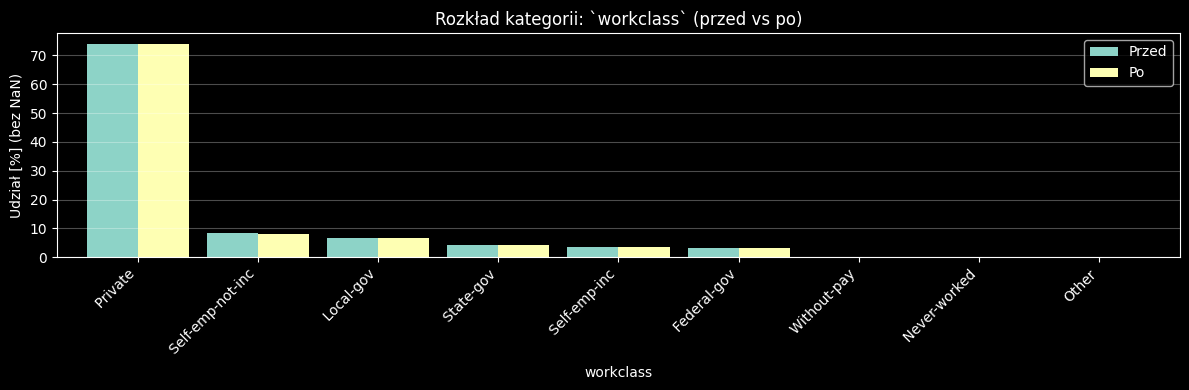

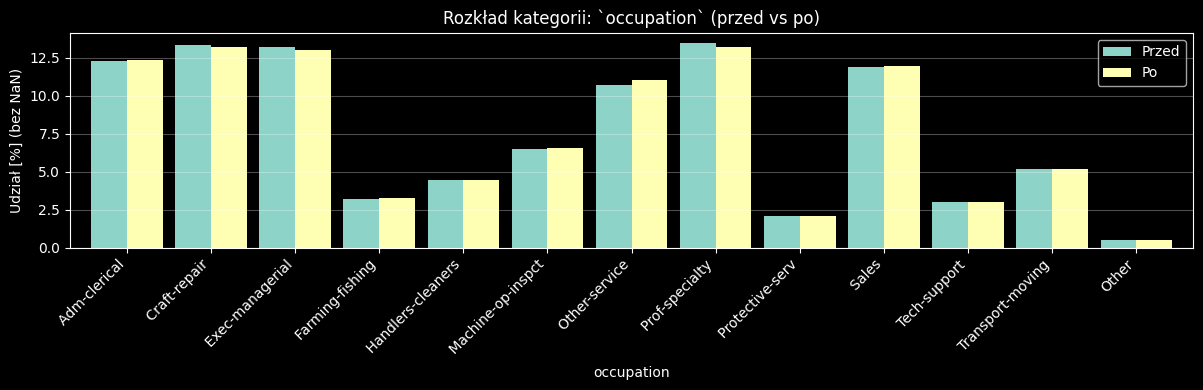

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zakładam, że masz w notebooku:
# adult      -> przed imputacją
# adult_imp  -> po imputacji

COLS = ["workclass", "occupation"]
TOP_N = 12
INCLUDE_OTHER = True  # True: dorzuca "Other" (sumę reszty); False: tylko top-N

def _value_pct(s: pd.Series) -> pd.Series:
    vc = s.value_counts(dropna=True)
    if vc.sum() == 0:
        return vc
    return (vc / vc.sum() * 100)

def plot_dist_before_after(before: pd.Series, after: pd.Series, title: str, top_n: int = 12, include_other: bool = True):
    vb = _value_pct(before)
    va = _value_pct(after)

    # Wspólna lista kategorii: top-N z przed i top-N z po
    cats = vb.head(top_n).index.union(va.head(top_n).index)

    vb_top = vb.reindex(cats, fill_value=0.0)
    va_top = va.reindex(cats, fill_value=0.0)

    if include_other:
        other_b = max(0.0, 100.0 - vb_top.sum())
        other_a = max(0.0, 100.0 - va_top.sum())
        vb_top.loc["Other"] = other_b
        va_top.loc["Other"] = other_a

    dfp = pd.DataFrame({"Przed": vb_top, "Po": va_top})

    ax = dfp.plot(kind="bar", figsize=(12, 4), width=0.85)
    ax.set_title(title)
    ax.set_ylabel("Udział [%] (bez NaN)")
    ax.grid(axis="y", alpha=0.3)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for col in COLS:
    plot_dist_before_after(
        adult[col],
        adult_imp[col],
        title=f"Rozkład kategorii: `{col}` (przed vs po)",
        top_n=TOP_N,
        include_other=INCLUDE_OTHER,
    )


In [16]:
# import pandas as pd
# import numpy as np
#
# # Zmienna do imputacji
# col_to_impute = "workclass"
#
# # Lista zmiennych pomocniczych do grupowania (wszystkie oprócz occupation)
# group_cols = ["age", "fnlwgt", "education-num", "sex", "race", "education", "hours-per-week", "capital-gain", "capital-loss", "native-country"]
#
# # Hot Deck Imputation z grupowaniem
# for idx in adult[adult[col_to_impute].isna()].index:
#     # wybierz podobne rekordy (bez braków w kolumnie do imputacji)
#     similar_rows = adult.loc[adult[col_to_impute].notna()]
#
#     # Grupowanie po kategorycznych zmiennych pomocniczych
#     mask = np.ones(len(similar_rows), dtype=bool)
#     for col in ["sex", "race", "education", "native-country"]:  # grupowanie po kategorycznych
#         mask &= (similar_rows[col] == adult.at[idx, col])
#
#     candidates = similar_rows[mask]
#
#     # Jeśli nie ma dopasowania w grupie, wybierz losowo z wszystkich pełnych rekordów
#     if len(candidates) == 0:
#         candidates = similar_rows
#
#     # Wybierz losowo wartość do imputacji
#     impute_value = candidates[col_to_impute].sample(n=1).values[0]
#     adult.at[idx, col_to_impute] = impute_value
#
# # Sprawdzenie braków
# print(adult["workclass"].isna().sum())
#


In [20]:
import numpy as np
import pandas as pd

# Zakładam, że masz:
# adult      -> przed imputacją
# adult_imp  -> po hot-decku (workclass/occupation)

# Upewnij się, że braki są NaN i nazwy kolumn bez spacji
adult.columns = adult.columns.str.strip()
adult.replace([" ?", "?"], np.nan, inplace=True)

adult_imp.columns = adult_imp.columns.str.strip()
adult_imp.replace([" ?", "?"], np.nan, inplace=True)

col = "native-country"

# Moda globalna (bez NaN)
mode_val = adult_imp[col].mode(dropna=True).iloc[0]

print("Moda dla native-country:", mode_val)
print("Braki przed:", int(adult_imp[col].isna().sum()))

# Imputacja: tylko NaN
adult_imp[col] = adult_imp[col].fillna(mode_val)

print("Braki po:", int(adult_imp[col].isna().sum()))


Moda dla native-country:  United-States
Braki przed: 583
Braki po: 0
